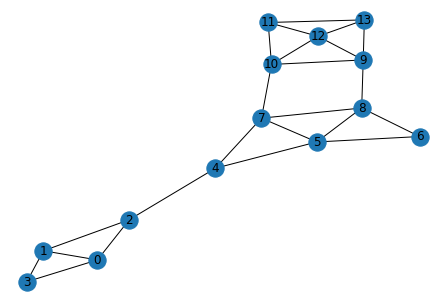

In [1]:
# community is the package containing some classical community detection algorithms. 
import networkx as nx
import community
import matplotlib.pyplot as plt

# 使用networkx建立图形
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
G.add_edges_from([(3, 0), (3, 1), (1, 0), (1, 2), (0, 2), (2, 4), (4, 7), (4, 5), (5, 7), (5, 6), (5, 8), (6, 8), (7, 8), (7, 10), (8, 9), (9, 10), (9, 12), (9, 13), (10, 12), (10, 11), (11, 13), (11, 12), (12,13)])
nx.draw(G,with_labels=True)
plt.show()

### read football graph
The network contains 115 nodes and 616 edges, where nodes in the network represent football teams, and edges between two nodes represent a match between the two teams. The 115 varsity teams are divided into 12 leagues. The process of the game is that the teams within the league play the group stage first, and then game between teams from different leagues. The federation can then be represented as the network's true community structure.

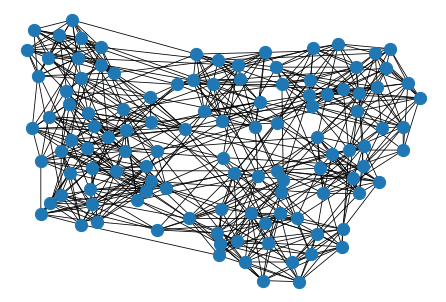

In [96]:
F = nx.read_gml("football.gml")
nx.draw(F, node_size=150,width=0.8)    #,with_labels=True)
# nx.draw(F,with_labels=True)
plt.show()

In [89]:
# 定义一个词典存储类别,
# l conserves true label
team_dict = {}
l = []
l_2 = []
for j in range(12):
    team_dict[j] = []
    l.append(set())
    l_2.append(set())
k = 0
for i in list(F.nodes):
    # print(G.nodes[i]['club'])
    label = F.nodes[i]['value']
    team_dict[label].append(i)
    l[label].add(k)
    k += 1
team_dict

{0: ['FloridaState',
  'NorthCarolinaState',
  'Virginia',
  'GeorgiaTech',
  'Duke',
  'NorthCarolina',
  'Clemson',
  'WakeForest',
  'Maryland'],
 1: ['VirginiaTech',
  'BostonCollege',
  'WestVirginia',
  'Syracuse',
  'Pittsburgh',
  'Temple',
  'Rutgers',
  'MiamiFlorida'],
 2: ['Iowa',
  'PennState',
  'Northwestern',
  'Wisconsin',
  'Michigan',
  'Purdue',
  'OhioState',
  'Minnesota',
  'Illinois',
  'MichiganState',
  'Indiana'],
 3: ['KansasState',
  'TexasTech',
  'Baylor',
  'Colorado',
  'Kansas',
  'IowaState',
  'Nebraska',
  'TexasA&M',
  'Oklahoma',
  'Texas',
  'Missouri',
  'OklahomaState'],
 4: ['EastCarolina',
  'Houston',
  'Louisville',
  'Memphis',
  'SouthernMississippi',
  'Tulane',
  'Army',
  'Cincinnati',
  'TexasChristian',
  'AlabamaBirmingham'],
 5: ['CentralFlorida', 'Connecticut', 'Navy', 'NotreDame', 'UtahState'],
 6: ['NorthernIllinois',
  'WesternMichigan',
  'Akron',
  'BallState',
  'BowlingGreenState',
  'Buffalo',
  'CentralMichigan',
  'Easte

In [24]:
# 获取邻接矩阵
import numpy as np
adj = np.array(nx.adjacency_matrix(F).todense())
adj

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### louvain_method
more details can be found in https://zhuanlan.zhihu.com/p/178790546

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/communities/visualization/draw_communities.py:89: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  collection.set_offset_position("data")
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][7]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][7]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][8]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][8]=x[1][0]


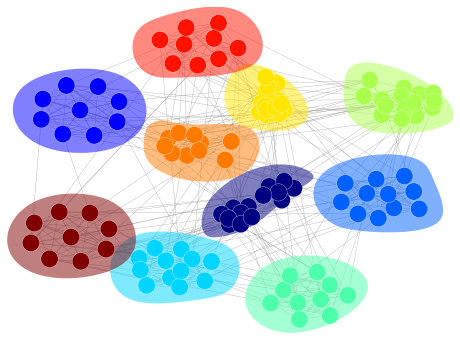

[{0, 4, 69, 104, 9, 41, 11, 16, 50, 23, 24, 90, 28, 93}, {1, 33, 37, 103, 105, 45, 109, 89, 25}, {32, 64, 2, 100, 6, 39, 106, 13, 15, 47, 60}, {98, 3, 5, 102, 40, 72, 74, 10, 107, 81, 52, 84}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {34, 99, 36, 38, 71, 42, 43, 12, 14, 18, 85, 54, 26, 61, 31}, {96, 65, 97, 70, 59, 76, 17, 113, 20, 87, 56, 58, 27, 63, 62, 95}, {35, 101, 79, 80, 82, 19, 30, 55, 29, 94}, {66, 75, 44, 48, 112, 86, 57, 91, 92}, {67, 73, 110, 46, 49, 114, 83, 53, 88}]


In [25]:
from communities.visualization import draw_communities
from communities.algorithms import louvain_method
communities, _ = louvain_method(adj)
communities
draw_communities(adj, communities)
print(communities)

In [54]:
# 自定义相似度衡量模型的结果 define similarity.
def similarity(l1,l2):
    sum_1 = 0
    sum_2 = 0
    #max_ = 0
    for i in l1:
        max_ = 0
        for j in l2:
            if len(i&j) > max_:
                max_ = len(i&j)
                # print(i&j)
                flag_ = l2.index(j)
        # print(max_,flag_)(测试使用)
        sum_1 += max_
        sum_2 += len(i)
    return sum_1/sum_2

In [55]:
l1 = communities
l2 = l
print(similarity(l1,l2))
print(similarity(l2,l1))
print((similarity(l1,l2)+similarity(l2,l1))/2)

0.8695652173913043
0.9217391304347826
0.8956521739130434


### girvan_newman
This method removes edges between clusters in the network based on low similarity, thereby separating communities from each other. The GN algorithm iteratively deletes edges according to the edge betweenness (the edge betweenness is defined as the ratio of the number of paths passing through the edge to the total number of shortest paths among all the shortest paths in the network) score, similar to the cut graph method.

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][5]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][5]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][9]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][9]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


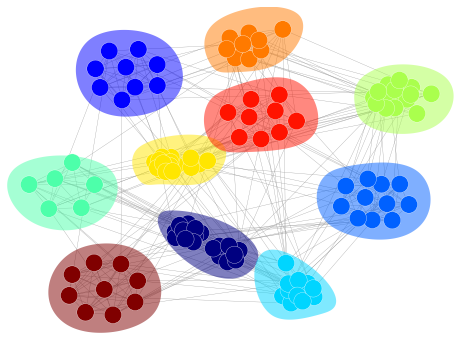

<AxesSubplot:>

In [56]:
from communities.algorithms import girvan_newman
communities, _ = girvan_newman(adj)
draw_communities(adj, communities)

In [57]:
l1 = communities
l2 = l
print(similarity(l1,l2))
print(similarity(l2,l1))
print((similarity(l1,l2)+similarity(l2,l1))/2)

0.8347826086956521
0.9217391304347826
0.8782608695652174


### spectral_clustering

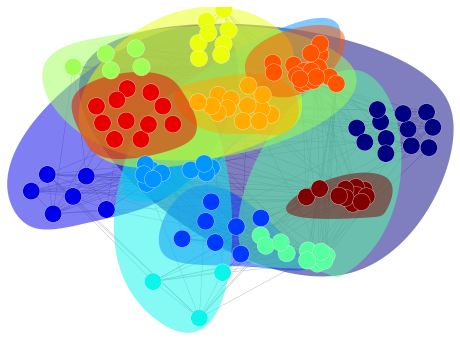

<AxesSubplot:>

In [69]:
from communities.algorithms import spectral_clustering
communities = spectral_clustering(adj,k=12)
# print(communities)
draw_communities(adj, communities)

In [70]:
l1 = communities
l2 = l
print(similarity(l1,l2))
print(similarity(l2,l1))
print((similarity(l1,l2)+similarity(l2,l1))/2)

0.6792452830188679
0.9304347826086956
0.8048400328137817


## node2vec+k-means

In [72]:
from node2vec import Node2Vec
 
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(F, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
 
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)
 

Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]

In [85]:
import pandas as pd
df_dict = {}
for name in list(F.nodes):
    df_dict[name] = model.wv[name]
df = pd.DataFrame.from_dict(df_dict,orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
BrighamYoung,0.196032,-0.008539,0.511466,0.217504,0.262847,-0.088335,-0.015094,0.371476,-0.193856,-0.190836,...,0.190554,0.368016,0.120649,0.011425,0.228033,0.052331,0.019433,-0.066470,0.227606,0.363994
FloridaState,0.079044,-0.027168,0.410667,0.382218,0.314819,0.046432,-0.008067,0.040860,0.166457,-0.281526,...,0.317979,-0.051458,0.194601,-0.261398,-0.078070,-0.024514,0.237624,-0.153107,0.223368,0.027433
Iowa,-0.313010,-0.250712,0.190417,-0.297294,-0.194433,-0.139530,-0.073679,-0.419527,0.375482,0.016926,...,-0.106300,0.471433,0.287644,-0.228100,-0.208647,0.030680,-0.113209,-0.032743,-0.099010,-0.239317
KansasState,0.068261,-0.056946,0.237163,-0.396606,-0.185734,-0.065881,-0.212952,-0.067739,0.168159,-0.076209,...,0.180290,0.315169,0.028755,-0.013476,-0.175118,0.480780,-0.045679,-0.130531,0.090144,-0.185626
NewMexico,0.159714,-0.153786,0.388614,0.039077,-0.137367,-0.324028,0.014872,0.137095,-0.193028,-0.134135,...,0.578139,0.197880,0.126025,0.011439,0.360516,0.186225,0.058481,-0.011709,0.116694,-0.068352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TexasChristian,0.056022,-0.154515,0.273274,-0.179751,-0.180501,-0.175194,0.264166,-0.201791,-0.184735,0.211434,...,-0.163656,0.049098,-0.072683,0.028463,0.037245,0.316622,-0.142816,-0.134863,-0.103854,-0.041372
California,0.486428,-0.118981,0.194046,-0.008343,-0.129282,-0.365844,0.102856,-0.014069,0.070891,0.379060,...,-0.168312,0.212098,0.093401,-0.080837,-0.239588,0.205483,-0.153461,0.190996,-0.030255,-0.019269
AlabamaBirmingham,0.133777,-0.304417,-0.101580,-0.237486,-0.026636,0.084719,-0.046086,0.114239,0.014612,-0.182198,...,0.242578,0.360239,-0.063098,0.340289,-0.088493,0.167779,0.081943,-0.620174,-0.074559,-0.221713
Arkansas,0.137163,-0.014718,0.053349,-0.179272,0.073262,0.110218,-0.157996,0.145852,0.129454,-0.325996,...,0.132229,-0.181787,-0.156962,0.214762,0.188203,-0.159095,-0.062473,-0.413040,0.130045,-0.069288


In [74]:
model.wv.most_similar('FloridaState')

[('Virginia', 0.8332949280738831),
 ('Maryland', 0.7458353042602539),
 ('GeorgiaTech', 0.7312699556350708),
 ('Duke', 0.7289118766784668),
 ('WakeForest', 0.7244424223899841),
 ('Clemson', 0.697650671005249),
 ('NorthCarolina', 0.6967555284500122),
 ('NorthCarolinaState', 0.6627148985862732),
 ('VirginiaTech', 0.46177247166633606),
 ('Vanderbilt', 0.4255177080631256)]

In [ ]:
# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings
 
# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)
 
# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)
 
# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder
 
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
 
# Look for embeddings on the fly - here we pass normal tuples
edges_embs[('1', '2')]
''' OUTPUT
array([ 5.75068220e-03, -1.10937878e-02,  3.76693785e-01,  2.69105062e-02,
       ... ... ....
       ..................................................................],
      dtype=float32)
'''
 
# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()
 
# Look for most similar edges - this time tuples must be sorted and as str
edges_kv.most_similar(str(('1', '2')))
 
# Save embeddings for later use
edges_kv.save_word2vec_format(EDGES_EMBEDDING_FILENAME)

In [86]:
# kmeans进行聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)

In [90]:
f = 0
for i in list(kmeans.labels_):
    l_2[i].add(f)
    f += 1
l_2

[{11, 24, 28, 50, 69, 90},
 {12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99},
 {44, 48, 57, 66, 75, 86, 91, 92, 112},
 {0, 4, 9, 16, 23, 41, 93, 104},
 {3, 5, 10, 40, 52, 72, 74, 81, 84, 97, 98, 102, 107},
 {17, 20, 27, 56, 62, 63, 65, 70, 76, 87, 95, 96, 113},
 {19, 29, 30, 35, 55, 79, 80, 82, 94, 101},
 {7, 8, 21, 22, 51, 68, 77, 78, 108, 111},
 {2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106},
 {58, 59},
 {1, 25, 33, 37, 45, 89, 103, 105, 109},
 {46, 49, 53, 67, 73, 83, 88, 110, 114}]

In [91]:
print(similarity(l,l_2))
print(similarity(l_2,l))
print((similarity(l,l_2)+similarity(l_2,l))/2)

0.9217391304347826
0.9130434782608695
0.9173913043478261


### hierarchical_clustering

In [93]:
from communities.algorithms import hierarchical_clustering
communities = hierarchical_clustering(adj, metric="euclidean", linkage="complete")
print(communities)
# draw_communities(adj, communities)
# spectral_clustering
print(similarity(l,communities))
print(similarity(communities,l))
print((similarity(communities,l)+similarity(l,communities))/2)

[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 108}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40}, {41}, {42}, {43}, {44}, {45}, {46}, {47}, {48}, {49}, {50}, {51}, {52}, {53}, {54}, {55}, {56}, {57}, {58}, {59}, {60}, {61}, {62}, {63}, {64}, {65}, {66}, {67}, {68}, {69}, {70}, {71}, {72}, {73}, {74}, {75}, {76}, {77}, {78}, {79}, {80}, {81}, {82}, {83}, {84}, {85}, {86}, {87}, {88}, {89}, {90}, {91}, {92}, {93}, {94}, {95}, {96}, {97}, {98}, {99}, {100}, {101}, {102}, {103}, {104}, {105}, {106}, {107}, {109}, {110}, {111}, {112}, {113}, {114}]
0.11304347826086956
1.0
0.5565217391304348


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/communities/algorithms/hierarchical_clustering.py:22: RuntimeWarning: divide by zero encountered in true_divide
  E = 1 / np.sqrt(p1 + p2 + p3)
